# Lung Cancer Survival Analysis

This notebook performs a comprehensive analysis of lung cancer patient data to predict survival outcomes. We'll explore the dataset, visualize patterns, and build machine learning models including logistic regression and a deep neural network.

## 1. Data Loading and Initial Setup

First, we'll import the necessary libraries for data analysis, visualization, and machine learning.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

Now we'll load the lung cancer dataset from the CSV file to begin our analysis.

In [ ]:
df = pd.read_csv('dataset_med.csv')

## 2. Initial Data Exploration

### Preview the Data

Let's take a first look at the dataset to understand its structure and the first few rows.

In [10]:
df.head()

id   age  gender      country diagnosis_date cancer_stage family_history  \
0   1  64.0    Male       Sweden     2016-04-05      Stage I            Yes   
1   2  50.0  Female  Netherlands     2023-04-20    Stage III            Yes   
2   3  65.0  Female      Hungary     2023-04-05    Stage III            Yes   
3   4  51.0  Female      Belgium     2016-02-05      Stage I             No   
4   5  37.0    Male   Luxembourg     2023-11-29      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   

   other_cancer treatment_type end_treatment_date  survived  
0             0   Chemotherapy         2017-09-10         0  
1             0        Surgery         2024-06-17         1  
2             0       Combined         2024-04-09         0  
3             0   Chemotherapy         2017-04-23         0  
4             0       Combined         2025-01-08         0

### Check Data Quality

Now let's check for missing values and duplicate records to assess data quality.

In [11]:
print(df.isnull().sum().any())
print(df.duplicated().sum().any())

False
False


### Dataset Shape and Information

Let's examine the dimensions of our dataset and get basic information about the columns.

In [12]:
df.shape

(890000, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

## 3. Feature Engineering

### Date Processing and Duration Calculation

We'll convert date columns to datetime format and calculate the treatment duration for each patient, which could be an important predictor.

In [14]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

df['duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

### Verify the New Duration Feature

Let's check how the data looks after adding the duration feature.

In [15]:
df.head()

id   age  gender      country diagnosis_date cancer_stage family_history  \
0   1  64.0    Male       Sweden     2016-04-05      Stage I            Yes   
1   2  50.0  Female  Netherlands     2023-04-20    Stage III            Yes   
2   3  65.0  Female      Hungary     2023-04-05    Stage III            Yes   
3   4  51.0  Female      Belgium     2016-02-05      Stage I             No   
4   5  37.0    Male   Luxembourg     2023-11-29      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   

   other_cancer treatment_type end_treatment_date  survived  duration  
0             0   Chemotherapy         2017-09-10         0       523  
1             0        Surgery         2024-06-17         1       424  
2             0       Combined         2024-04-09         0       370  
3             0   Chemotherapy         2017-04-23         0       443  
4             0       Combined         2025-01-08         0       406

### Feature Categorization

Let's identify and separate continuous (numerical) features from categorical features for appropriate analysis and preprocessing.

In [16]:
continuous_features = ['age','bmi','cholesterol_level','duration']
categorical_features = df.columns.difference(continuous_features).tolist()

categorical_features.remove('id')
categorical_features.remove('diagnosis_date')
categorical_features.remove('end_treatment_date')

print(continuous_features)
print(categorical_features)

['age', 'bmi', 'cholesterol_level', 'duration']
['asthma', 'cancer_stage', 'cirrhosis', 'country', 'family_history', 'gender', 'hypertension', 'other_cancer', 'smoking_status', 'survived', 'treatment_type']


## 4. Exploratory Data Analysis (EDA)

### Distribution Analysis of Continuous Features

Let's visualize the distribution of continuous variables to understand their characteristics and identify any potential outliers or patterns.

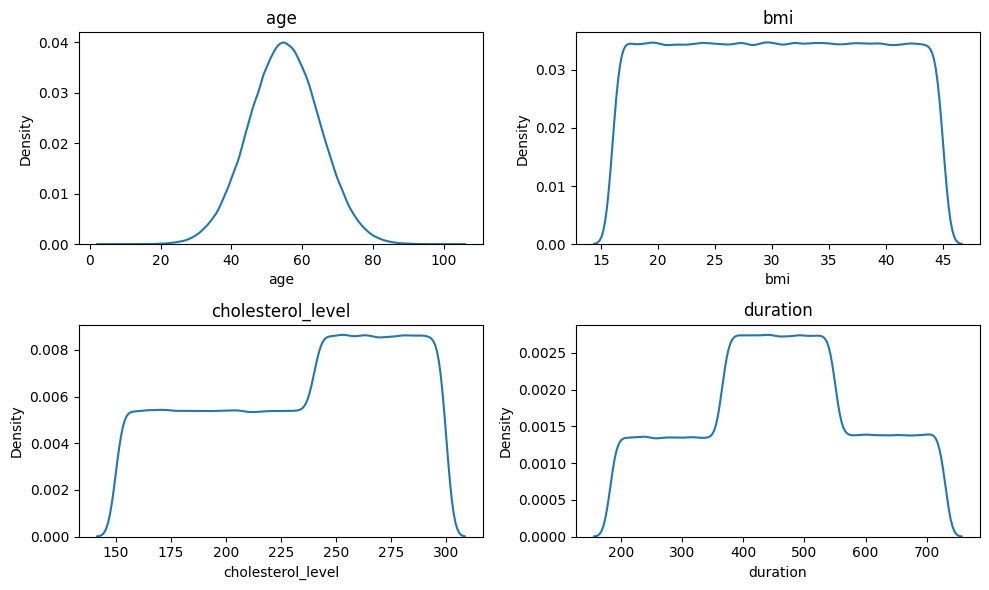

In [17]:
fig, axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()

for i in range(4):
    sns.kdeplot(df[continuous_features[i]], ax=axes[i])
    axes[i].set_title(continuous_features[i])

plt.tight_layout()
plt.show()

### Distribution Analysis of Categorical Features

Now let's examine the distribution of categorical variables to understand class imbalances and frequency patterns.

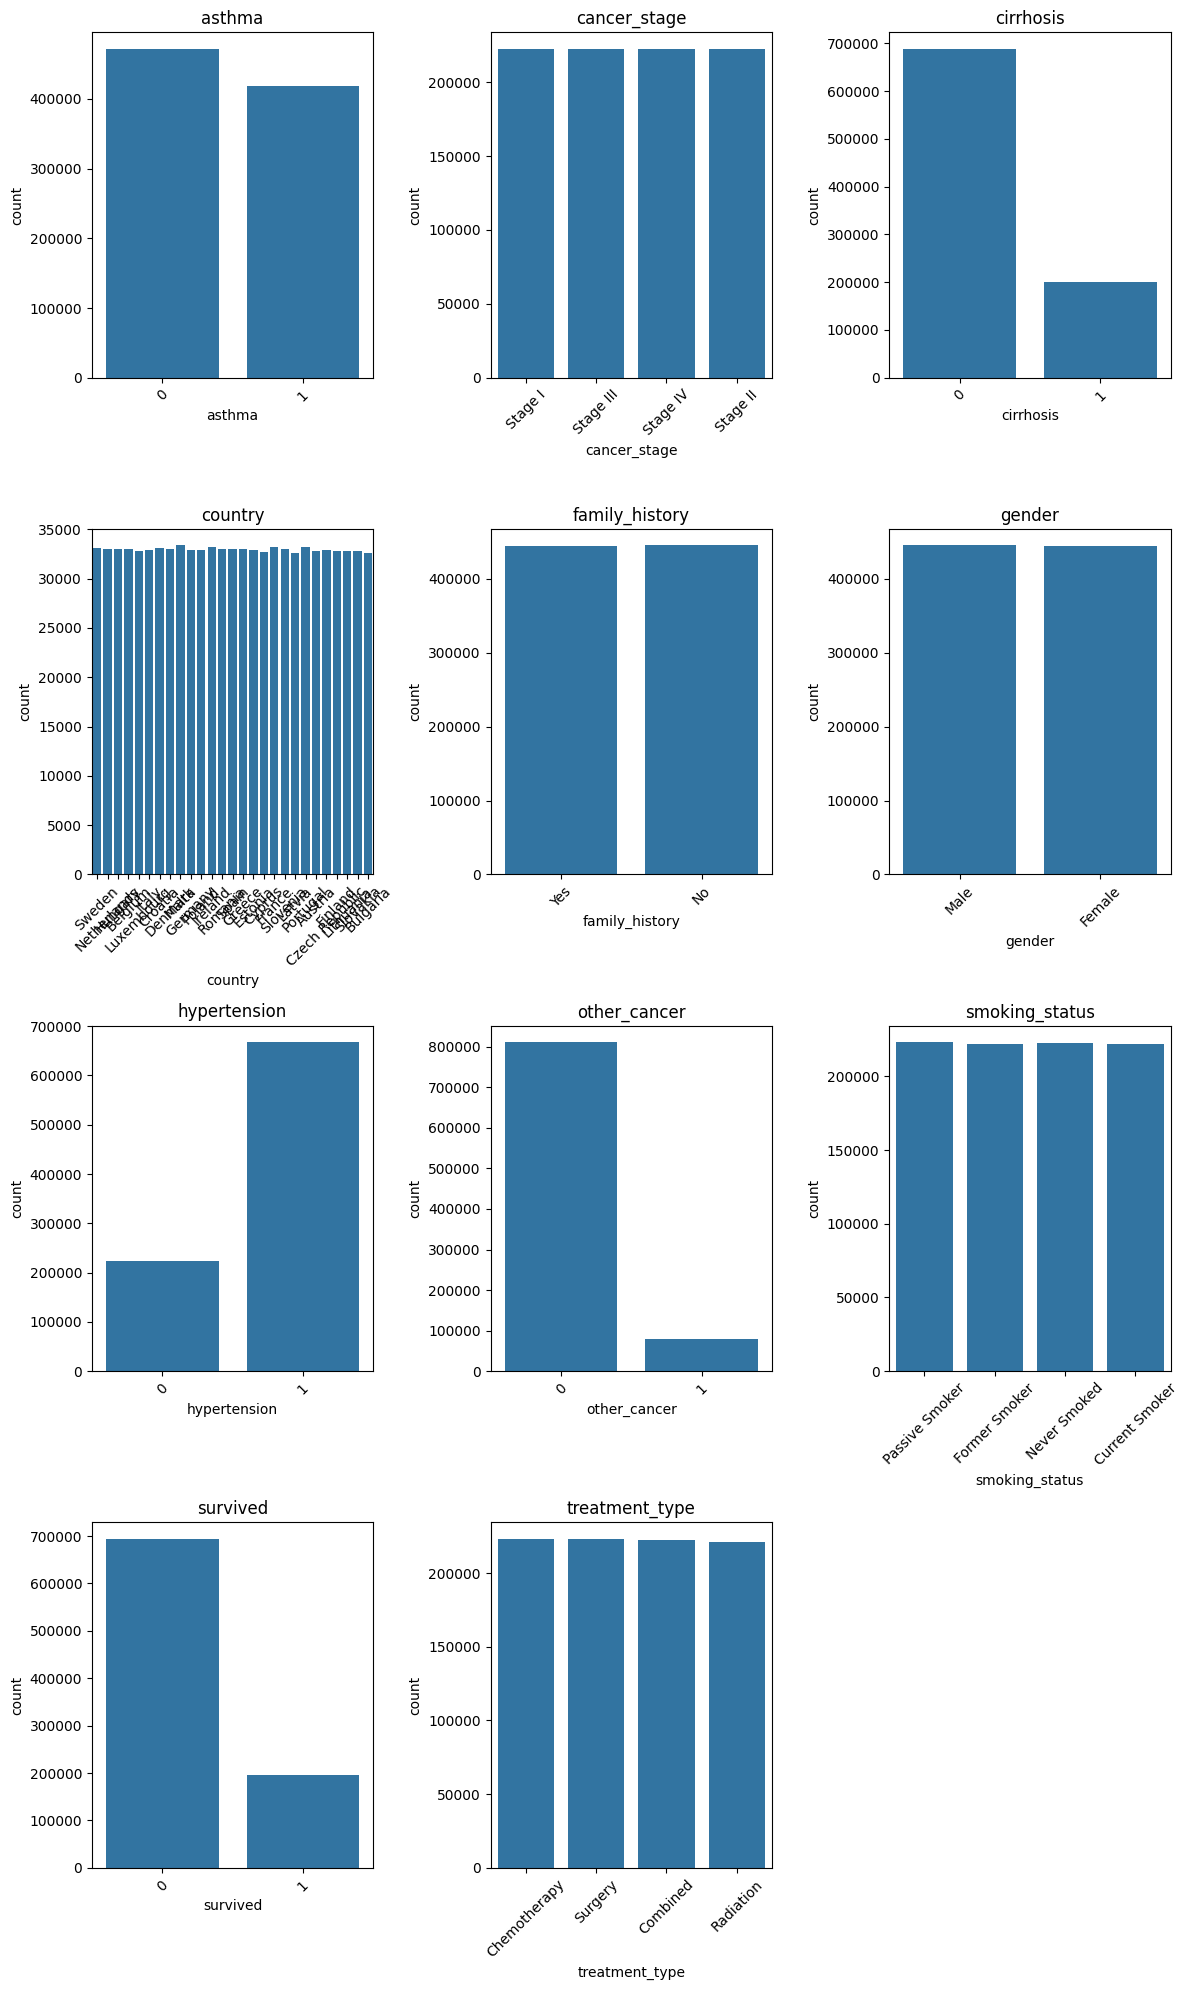

In [18]:
fig , axes = plt.subplots(4,3,figsize=(12,20))

axes = axes.flatten()

for i in range(len(categorical_features)):
    sns.countplot(x=df[categorical_features[i]], ax=axes[i])
    axes[i].set_title(categorical_features[i])
    axes[i].tick_params(axis='x', rotation=45)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

### Correlation Analysis

Let's examine the correlations between numerical features to identify potential multicollinearity and relationships.

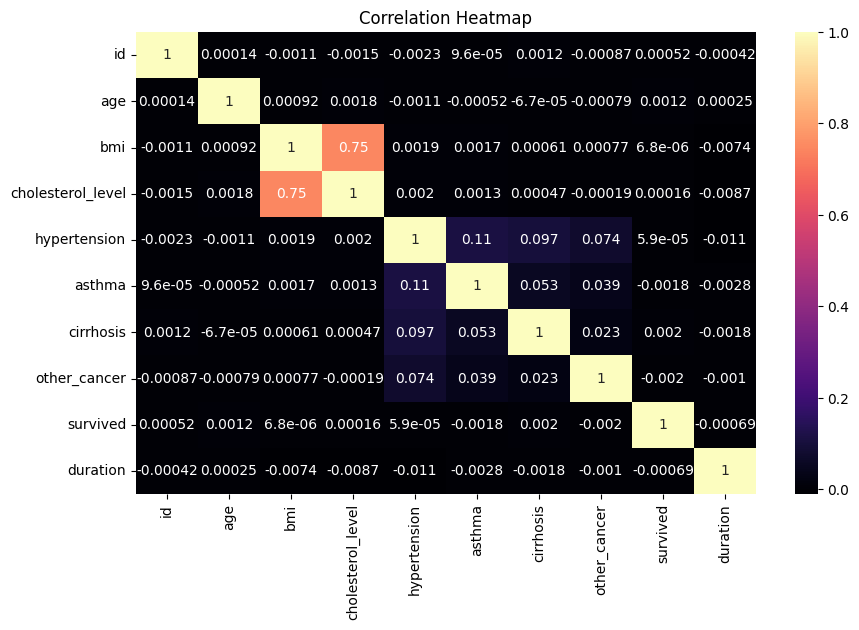

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()


### Pairwise Relationships with Survival Outcome

Let's create pairplots to visualize relationships between continuous features, colored by survival status to identify patterns.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


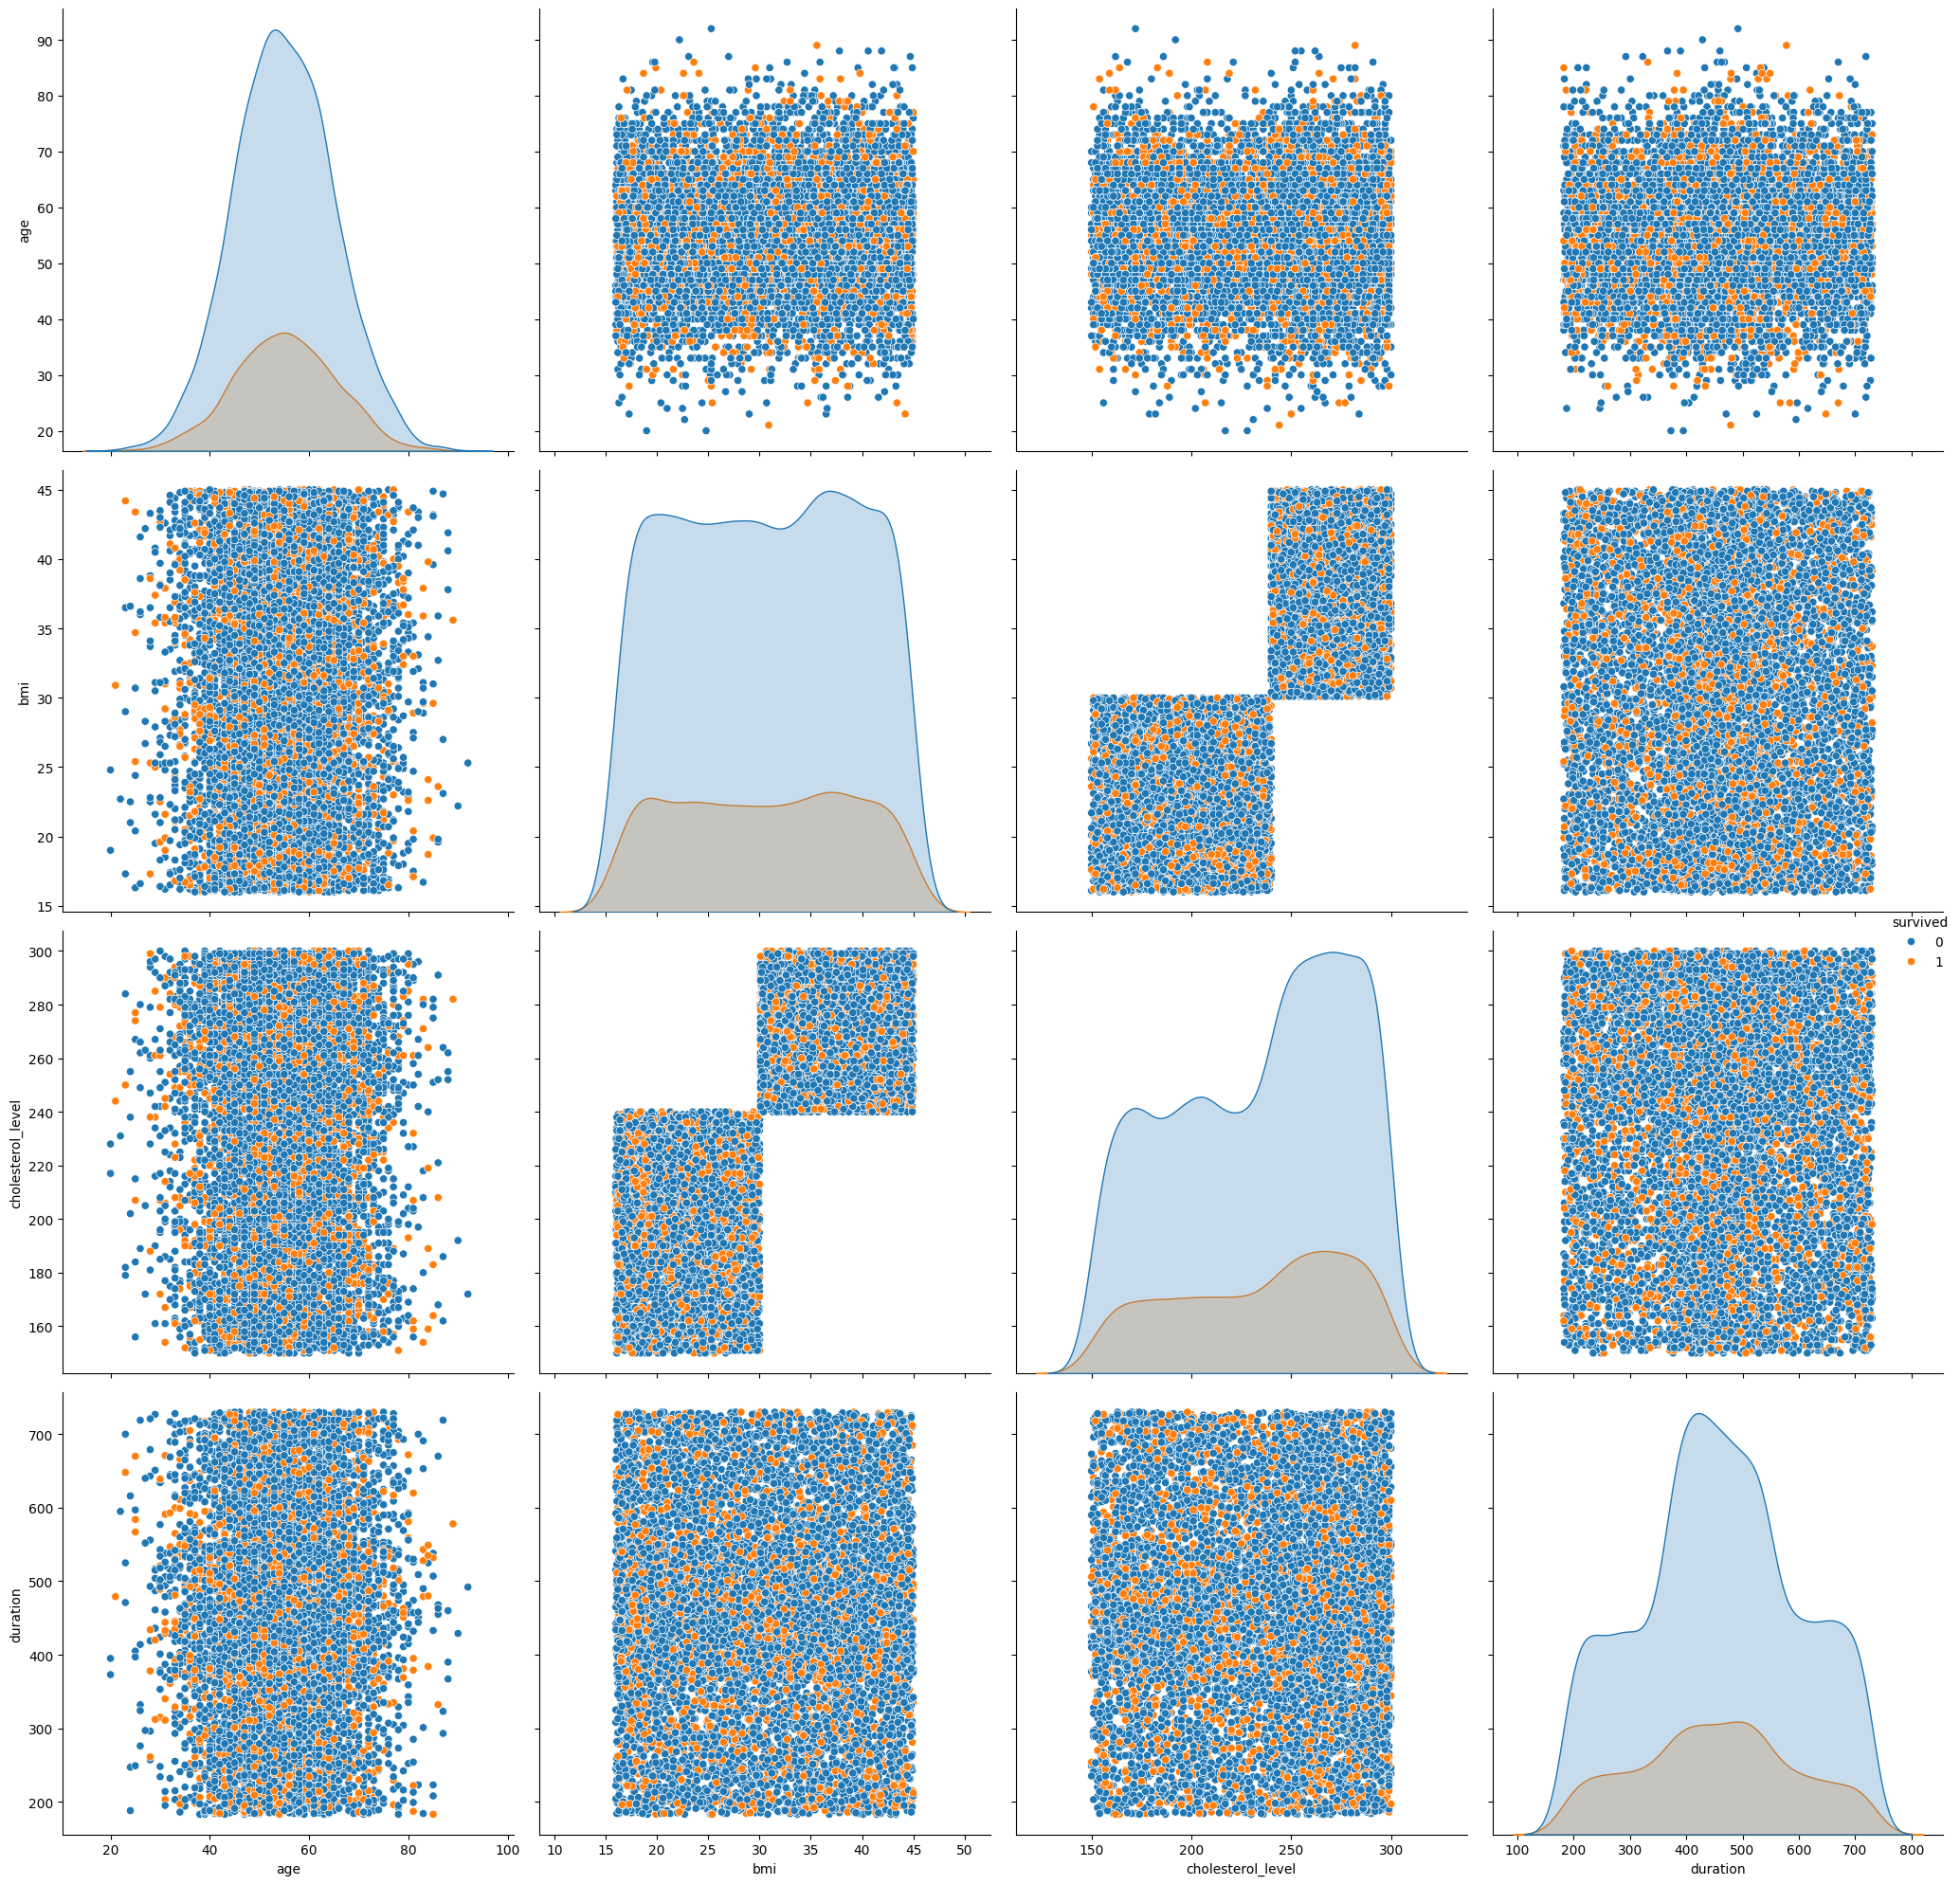

In [20]:
import seaborn as sns

sns.pairplot(data=df.sample(10_000), vars=continuous_features, hue='survived',size=5)
plt.tight_layout()
plt.show()


### Age Distribution by Country and Survival

Let's analyze how age varies across different countries and its relationship with survival outcomes.

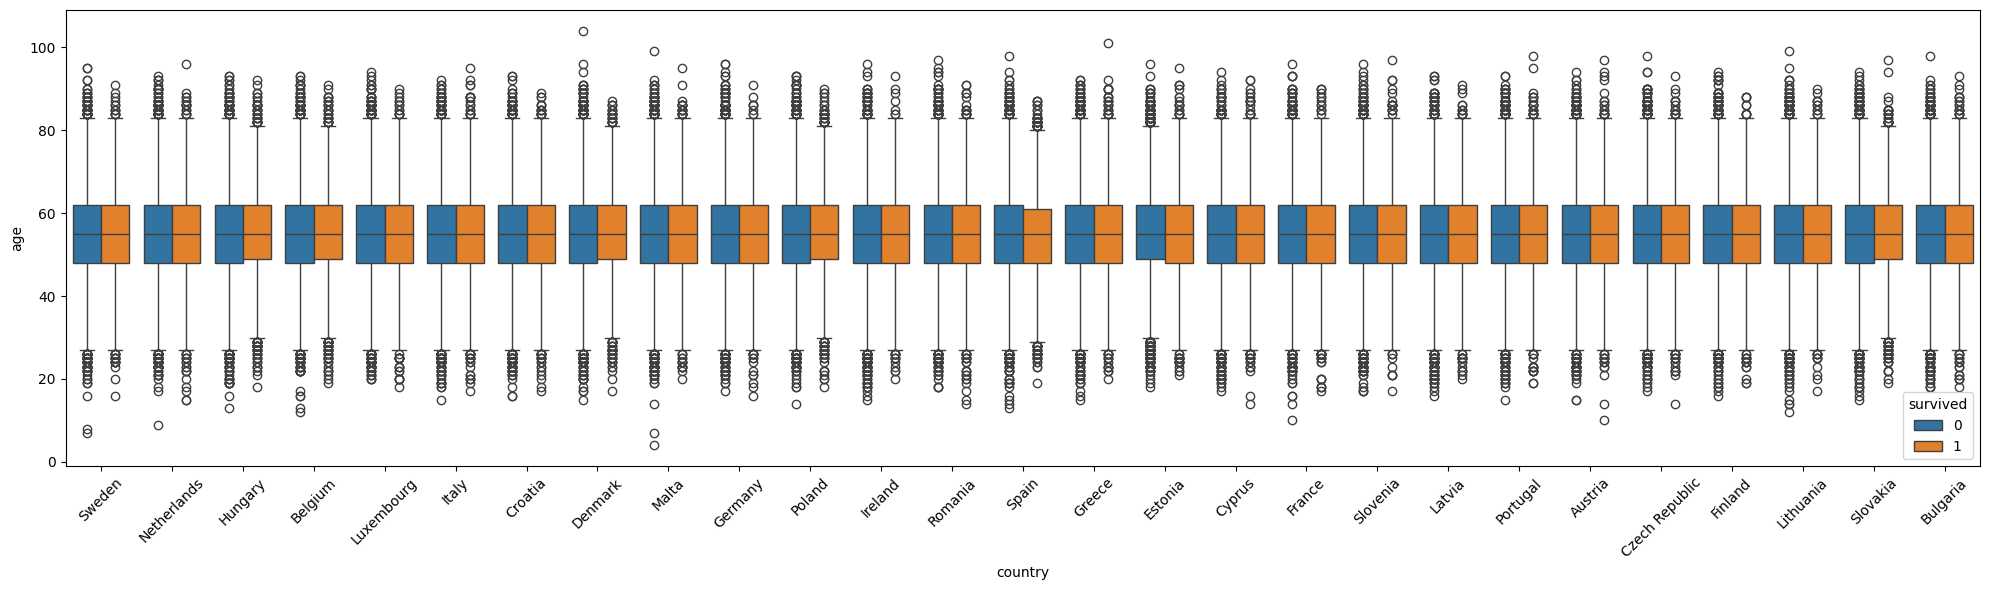

In [21]:
plt.figure(figsize=(20,6))
sns.boxplot(df,x='country',y='age',hue='survived')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Cholesterol Levels by Cancer Stage and Survival

Let's examine how cholesterol levels vary across different cancer stages and their relationship with survival.

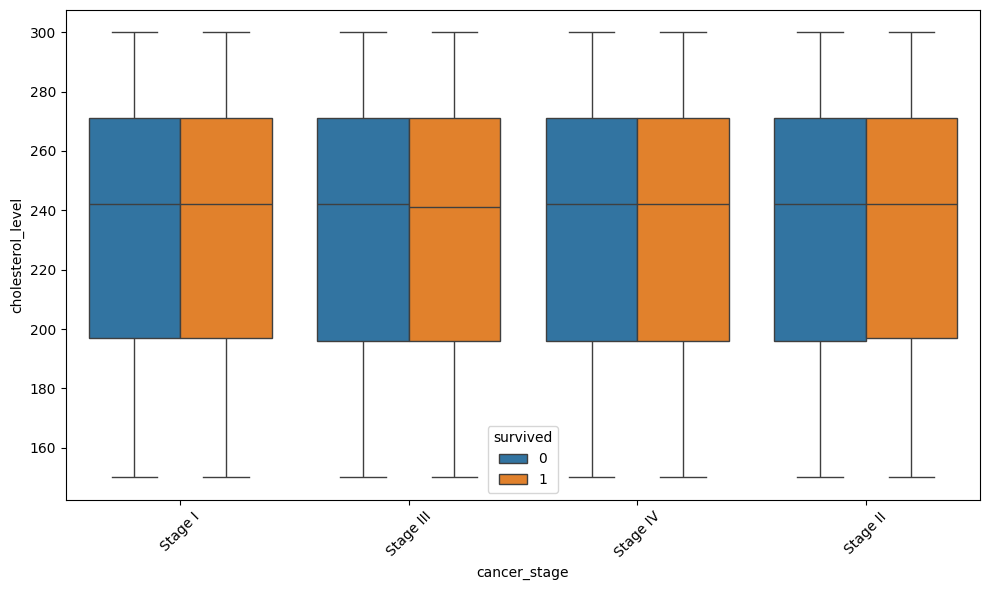

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(df,x='cancer_stage',y='cholesterol_level',hue='survived')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Smoking Status and Survival Analysis

Let's analyze the relationship between smoking status and survival outcomes.

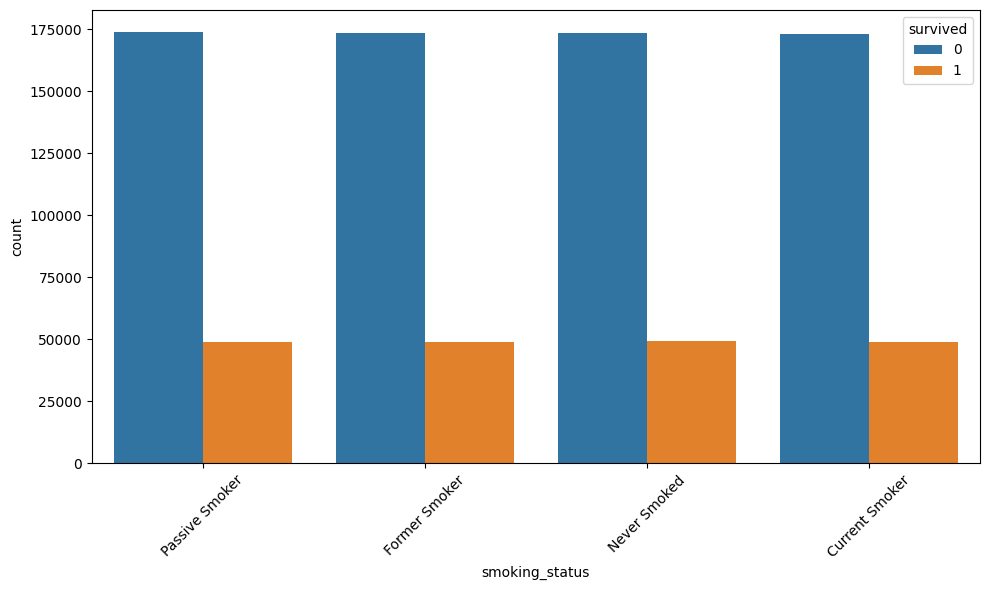

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df,x='smoking_status',hue='survived')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 5. Data Preprocessing

### Label Encoding and Feature Scaling

We need to convert categorical variables to numerical format using label encoding and standardize continuous features for machine learning algorithms.

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

for col in categorical_features:
    df[col] = le.fit_transform(df[col])

for col in continuous_features:
    df[col] = scaler.fit_transform(df[[col]])


### Verify Preprocessing Results

Let's check how the data looks after encoding and scaling transformations.

In [25]:
df.head()

id       age  gender  country diagnosis_date  cancer_stage  family_history  \
0   1  0.899796       1       26     2016-04-05             0               1   
1   2 -0.500977       0       19     2023-04-20             2               1   
2   3  0.999851       0       12     2023-04-05             2               1   
3   4 -0.400922       0        1     2016-02-05             0               0   
4   5 -1.801696       1       17     2023-11-29             0               0   

   smoking_status       bmi  cholesterol_level  hypertension  asthma  \
0               3 -0.130748          -0.797424             0       0   
1               3  1.279296           1.067550             1       1   
2               1  1.613882           0.791257             1       1   
3               3  1.494387           0.169599             1       1   
4               3 -1.289852          -1.280936             0       0   

   cirrhosis  other_cancer  treatment_type end_treatment_date  survived  \
0          1             0               0         2017-09-10         0   
1          0             0               3         2024-06-17         1   
2          0             0               1         2024-04-09         0   
3          0             0               0         2017-04-23         0   
4          0             0               1         2025-01-08         0   

   duration  
0  0.465906  
1 -0.244658  
2 -0.632238  
3 -0.108287  
4 -0.373851

### Prepare Features and Target Variable

Let's separate the features (X) from the target variable (survived) and prepare for machine learning.

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['id','diagnosis_date','end_treatment_date','survived'])
y = df['survived']


### Feature Selection using Extra Trees

We'll use an Extra Trees classifier to identify the most important features and reduce dimensionality.

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X,y)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

print(X_new.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(890000, 5)


### Train-Test Split

Let's split our selected features into training and testing sets for model evaluation.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42,stratify=y)
print(X_train.shape, X_test.shape)

(623000, 5) (267000, 5)


### Feature Importance Analysis

Let's examine the importance scores assigned to each feature by the Extra Trees classifier.

In [29]:
for i, feature in enumerate(clf.feature_names_in_):
    print(f"Feature {feature}: {clf.feature_importances_[i]}")

Feature age: 0.16511085105641227
Feature gender: 0.011334352724203012
Feature country: 0.14550387444738727
Feature cancer_stage: 0.032961010583672644
Feature family_history: 0.010987257041504517
Feature smoking_status: 0.04570063317132971
Feature bmi: 0.17311196798934697
Feature cholesterol_level: 0.17000953561444143
Feature hypertension: 0.011165362110182668
Feature asthma: 0.009763700819038023
Feature cirrhosis: 0.006895893263414467
Feature other_cancer: 0.005178365689189636
Feature treatment_type: 0.03719835935294501
Feature duration: 0.17507883613693231


### Selected Features

Let's see which features were selected by our feature selection process.

In [30]:
selected_cols = X.columns[model.get_support()]
print(selected_cols)


Index(['age', 'country', 'bmi', 'cholesterol_level', 'duration'], dtype='object')


### Handle Class Imbalance with SMOTE

We'll use SMOTE (Synthetic Minority Oversampling Technique) to address class imbalance in our training data.

In [31]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [45]:
from imblearn.over_sampling import SMOTENC
cat_indices = []
for i in categorical_features:
  if i in selected_cols:

    cat_indices.append(df.columns.get_loc(i))

smote_nc = SMOTENC(categorical_features=cat_indices, random_state=42,)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train) # type: ignore

## 6. Machine Learning Models

### Logistic Regression Baseline Model

Let's start with a logistic regression model as our baseline and evaluate its performance on the original (non-SMOTE) training data.

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    208199
           1       0.00      0.00      0.00     58801

    accuracy                           0.78    267000
   macro avg       0.39      0.50      0.44    267000
weighted avg       0.61      0.78      0.68    267000

Accuracy: 0.7797715355805244
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


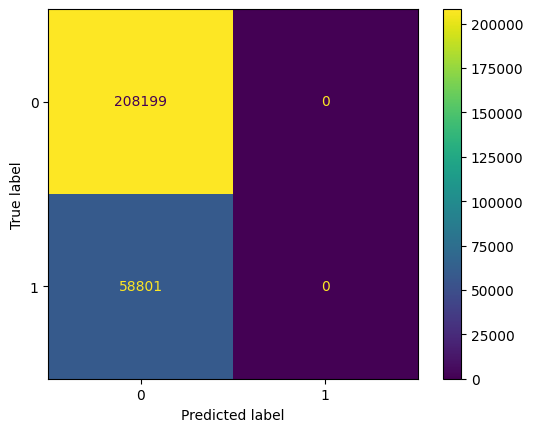

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()

### Deep Learning Model Implementation

Now let's implement a deep neural network using PyTorch for potentially better performance. First, we'll create a custom dataset class.

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

class LungCancerDataset(Dataset):
    def __init__(self, X, y):
        if hasattr(X, "to_numpy"):  # if it's a DataFrame/Series
            X = X.to_numpy()
        if hasattr(y, "to_numpy"):
            y = y.to_numpy()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

### Create Data Loaders

Let's create PyTorch data loaders for efficient batch processing during training and evaluation.

In [57]:

train_dataset = LungCancerDataset(X_resampled, y_resampled )
test_dataset = LungCancerDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,pin_memory=True,num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False,pin_memory=True,num_workers=4)



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Neural Network Architecture

Let's define a deep neural network with multiple layers, batch normalization, and dropout for regularization.

In [62]:
class LungCancerModel(nn.Module):
    def __init__(self, input_size):
        super(LungCancerModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.1),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.1),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.1),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.model(x)
        return x

### Model Setup and Training Configuration

Let's initialize our model, loss function, and optimizer for training.

In [70]:
model = LungCancerModel(input_size=X_resampled.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Device Configuration

Let's set up the computing device (GPU if available, otherwise CPU) for training.

In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

LungCancerModel(
  (model): Sequential(
    (0): Linear(in_features=5, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Dropout(p=0.1, inplace=False)
    (16): Linear(in_features=256, out_features=128, bias=True)
    (17): B

### Model Training Loop

Now let's train our neural network with proper validation and early stopping based on validation accuracy.

In [72]:
from tqdm import tqdm

num_epochs = 20

best_model_wt = None
best_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0

    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for inputs, labels in pbar:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        total += labels.size(0)

        # prediction
        probs = torch.sigmoid(outputs)
        predicted = (probs >= 0.5).float()
        correct += (predicted == labels).sum().item()

        pbar.set_postfix_str(f"Loss: {running_loss:.4f}, Acc: {correct/total * 100 :.4f}")

    epoch_loss = running_loss / total if total > 0 else 0
    train_acc = correct / total if total > 0 else 0

    # ----- Evaluation -----
    model.eval()
    val_running_loss = 0.0
    val_total = 0
    val_correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            val_total += labels.size(0)

            probs = torch.sigmoid(outputs)
            predicted = (probs >= 0.5).float()
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / val_total if val_total > 0 else 0
    val_acc = val_correct / val_total if val_total > 0 else 0

    if val_acc > best_acc:
      best_acc = val_acc
      best_model_wt = model.state_dict()

    print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_acc:.4f}", end=' || ')
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_acc:.4f}")


Epoch 1/20: 100%|██████████| 15182/15182 [02:55<00:00, 86.52it/s, Loss: 674011.4145, Acc: 50.0208]


Training Loss: 0.6937, Training Accuracy: 0.5002 || Validation Loss: 0.7000, Validation Accuracy: 0.2202


Epoch 2/20: 100%|██████████| 15182/15182 [02:48<00:00, 90.02it/s, Loss: 673536.0412, Acc: 49.9900]


Training Loss: 0.6932, Training Accuracy: 0.4999 || Validation Loss: 0.6909, Validation Accuracy: 0.7334


Epoch 3/20: 100%|██████████| 15182/15182 [02:53<00:00, 87.30it/s, Loss: 673446.4701, Acc: 50.2058]


Training Loss: 0.6931, Training Accuracy: 0.5021 || Validation Loss: 0.6906, Validation Accuracy: 0.3665


Epoch 4/20: 100%|██████████| 15182/15182 [02:41<00:00, 94.19it/s, Loss: 673336.7060, Acc: 50.6118]


Training Loss: 0.6930, Training Accuracy: 0.5061 || Validation Loss: 0.6952, Validation Accuracy: 0.4432


Epoch 5/20: 100%|██████████| 15182/15182 [02:38<00:00, 95.81it/s, Loss: 673218.5661, Acc: 50.8514]


Training Loss: 0.6929, Training Accuracy: 0.5085 || Validation Loss: 0.6880, Validation Accuracy: 0.6384


Epoch 6/20: 100%|██████████| 15182/15182 [02:44<00:00, 92.22it/s, Loss: 673091.5134, Acc: 51.0425]


Training Loss: 0.6928, Training Accuracy: 0.5104 || Validation Loss: 0.6987, Validation Accuracy: 0.4022


Epoch 7/20: 100%|██████████| 15182/15182 [02:37<00:00, 96.11it/s, Loss: 673079.6551, Acc: 51.0925] 


Training Loss: 0.6928, Training Accuracy: 0.5109 || Validation Loss: 0.6924, Validation Accuracy: 0.4566


Epoch 8/20: 100%|██████████| 15182/15182 [02:45<00:00, 91.82it/s, Loss: 672960.2525, Acc: 51.2263]


Training Loss: 0.6926, Training Accuracy: 0.5123 || Validation Loss: 0.6969, Validation Accuracy: 0.4705


Epoch 9/20: 100%|██████████| 15182/15182 [02:37<00:00, 96.28it/s, Loss: 672834.5628, Acc: 51.3854] 


Training Loss: 0.6925, Training Accuracy: 0.5139 || Validation Loss: 0.6947, Validation Accuracy: 0.5080


Epoch 10/20: 100%|██████████| 15182/15182 [02:39<00:00, 95.28it/s, Loss: 672733.5332, Acc: 51.5890]


Training Loss: 0.6924, Training Accuracy: 0.5159 || Validation Loss: 0.6988, Validation Accuracy: 0.4767


Epoch 11/20: 100%|██████████| 15182/15182 [02:36<00:00, 97.03it/s, Loss: 672605.7699, Acc: 51.6456]


Training Loss: 0.6923, Training Accuracy: 0.5165 || Validation Loss: 0.6996, Validation Accuracy: 0.4730


Epoch 12/20: 100%|██████████| 15182/15182 [02:22<00:00, 106.41it/s, Loss: 672508.8944, Acc: 51.7185]


Training Loss: 0.6922, Training Accuracy: 0.5172 || Validation Loss: 0.6975, Validation Accuracy: 0.4769


Epoch 13/20: 100%|██████████| 15182/15182 [02:21<00:00, 107.36it/s, Loss: 672454.9790, Acc: 51.7962]


Training Loss: 0.6921, Training Accuracy: 0.5180 || Validation Loss: 0.6951, Validation Accuracy: 0.5056


Epoch 14/20: 100%|██████████| 15182/15182 [02:26<00:00, 103.39it/s, Loss: 672414.5346, Acc: 51.8210]


Training Loss: 0.6921, Training Accuracy: 0.5182 || Validation Loss: 0.6914, Validation Accuracy: 0.5283


Epoch 15/20: 100%|██████████| 15182/15182 [02:23<00:00, 106.05it/s, Loss: 672442.4625, Acc: 51.7607]


Training Loss: 0.6921, Training Accuracy: 0.5176 || Validation Loss: 0.6899, Validation Accuracy: 0.5124


Epoch 16/20: 100%|██████████| 15182/15182 [02:30<00:00, 101.21it/s, Loss: 672352.7007, Acc: 51.8782]


Training Loss: 0.6920, Training Accuracy: 0.5188 || Validation Loss: 0.6939, Validation Accuracy: 0.4896


Epoch 17/20: 100%|██████████| 15182/15182 [02:30<00:00, 100.54it/s, Loss: 672269.3659, Acc: 51.8938]


Training Loss: 0.6919, Training Accuracy: 0.5189 || Validation Loss: 0.6906, Validation Accuracy: 0.5000


Epoch 18/20: 100%|██████████| 15182/15182 [02:29<00:00, 101.42it/s, Loss: 672221.2028, Acc: 52.0232]


Training Loss: 0.6919, Training Accuracy: 0.5202 || Validation Loss: 0.6947, Validation Accuracy: 0.4557


Epoch 19/20: 100%|██████████| 15182/15182 [02:22<00:00, 106.25it/s, Loss: 672265.9905, Acc: 51.9074]


Training Loss: 0.6919, Training Accuracy: 0.5191 || Validation Loss: 0.6942, Validation Accuracy: 0.4721


Epoch 20/20: 100%|██████████| 15182/15182 [02:26<00:00, 103.33it/s, Loss: 672129.3463, Acc: 52.0444]


Training Loss: 0.6918, Training Accuracy: 0.5204 || Validation Loss: 0.7013, Validation Accuracy: 0.4295


### Prediction Function

Let's create a helper function to make predictions with our trained model.

In [76]:
def predict(model, X, threshold=0.5):

    model.eval()
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

    with torch.no_grad():
        outputs = model(X_tensor)            # logits (n,1)
        probs = torch.sigmoid(outputs)       # probabilities
        preds = (probs > threshold).int()    # labels

    return preds.cpu().numpy().ravel(), probs.cpu().numpy().ravel()


### Model Performance Summary

Let's check the best validation accuracy achieved during training.

In [83]:
best_acc

0.7333632958801498